In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1=df.drop(['area_type','availability','society','balcony'],axis='columns')
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [4]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df2=df1.dropna(how='any')
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [6]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2

C:\Users\dell\AppData\Local\Temp\ipykernel_21692\2581699994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [8]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [9]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [10]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [12]:
def convert_to_float(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [13]:
df3=df2.copy()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [14]:
df3['total_sqft']=df3['total_sqft'].apply(convert_to_float)

In [15]:
df3[30:]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2475.0,4.0,186.00,4
31,Bisuvanahalli,3 BHK,1075.0,2.0,35.00,3
32,Hebbal,3 BHK,1760.0,2.0,123.00,3
33,Raja Rajeshwari Nagar,3 BHK,1693.0,3.0,57.39,3
34,Kasturi Nagar,3 BHK,1925.0,3.0,125.00,3
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [16]:
df3.isna().sum()
df3.dropna(how='any')

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [17]:
df3.isna().sum()
df3.dropna(how='any')

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [18]:
df3.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [19]:
df3=df3.dropna(how='any')
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [20]:
df3[30:]
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [21]:
df4=df3.copy()
df4

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [22]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [24]:
df4.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
BHK               0
price_per_sqft    0
dtype: int64

In [26]:
len(df4['location'].unique())

1298

In [27]:
df4.location=df4.location.apply(lambda x: x.strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [28]:
len(location_stats[location_stats<=10])

1047

In [29]:
location_stats_lessthan_10=location_stats[location_stats<=10]


In [30]:
df4.location=df4.location.apply(lambda x:'other' if x in location_stats_lessthan_10 else x)

In [31]:
len(df4.location.unique())

241

In [32]:
df4

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [33]:
df4[df4.total_sqft/df4.BHK <=300].head(20)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
93,ISRO Layout,4 Bedroom,1200.0,4.0,155.0,4,12916.666667
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158


In [34]:
df5=df4[~(df4.total_sqft/df4.BHK <=300)]
df5

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [35]:
df5[9:]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
10,Whitefield,3 BHK,1800.0,2.0,70.0,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,38.0,2,3800.000000
13,Gottigere,2 BHK,1100.0,2.0,40.0,2,3636.363636
14,Sarjapur,3 Bedroom,2250.0,3.0,148.0,3,6577.777778
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.0,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407.336319


In [36]:
df5.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
# Removing outliners

def remove_outliners_ppsf(df_input):
    df_out=pd.DataFrame()
    for location_name,subdf in df_input.groupby('location'):
        mean=np.mean(df_input.price_per_sqft)
        std=np.std(df_input.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    
    return df_out

In [38]:
df6=remove_outliners_ppsf(df5)

In [39]:
df6.price_per_sqft.describe()
df6.shape

(11167, 7)

In [40]:
df6.price_per_sqft.describe()

count    11167.000000
mean      5335.420181
std       1624.542652
min       2159.090909
25%       4111.460296
50%       5066.666667
75%       6321.243523
max      10263.157895
Name: price_per_sqft, dtype: float64

In [41]:
def plotting(df,location):
    bhk2_df=df[(df.location==location) & (df.BHK==2)]
    bhk3_df=df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2_df.total_sqft,bhk2_df.price,color='red',marker='+',label='2BHK')
    plt.scatter(bhk3_df.total_sqft,bhk3_df.price,color='blue',marker='*',label='3BHK')
    plt.xlabel("Total area in sqft")
    plt.ylabel("total price in Lakhs")
    plt.legend()
    
    

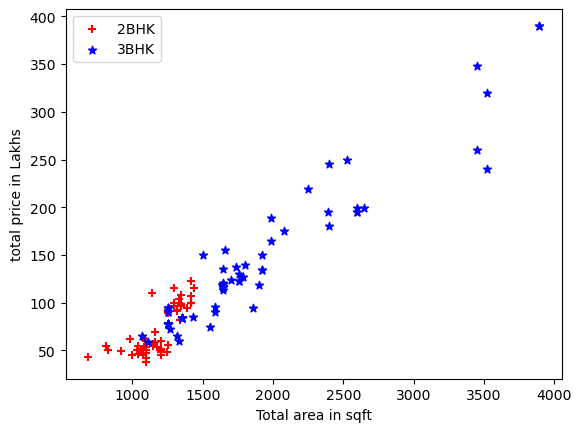

In [42]:
plotting(df6,'Hebbal')

In [43]:
def remove_bhk_outliners(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):   # location: name ; location_df: dataframe with that particular location
        bhk_stats={}                  # to store the mean,std,count of each bhk like..2,3,in that particular location
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
                
            

In [44]:
df7=remove_bhk_outliners(df6)

In [45]:
df7

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000
1,1st Block Jayanagar,3 BHK,1760.0,3.0,115.0,3,6534.090909
3,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
4,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525
5,1st Phase JP Nagar,3 BHK,2024.0,3.0,157.0,3,7756.916996
...,...,...,...,...,...,...,...
11160,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
11161,other,2 BHK,1095.0,2.0,57.0,2,5205.479452
11162,other,2 BHK,1256.0,2.0,65.0,2,5175.159236
11163,other,2 BHK,1353.0,2.0,110.0,2,8130.081301


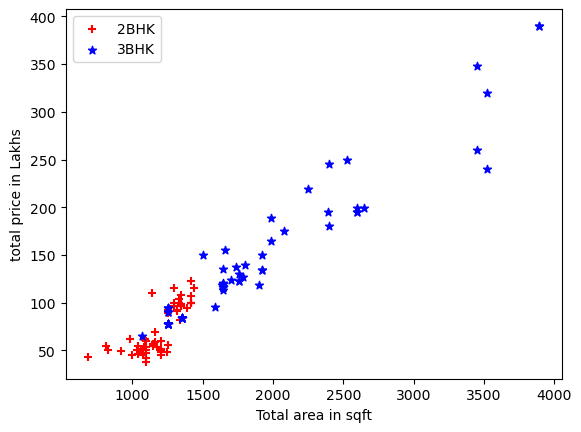

In [46]:
plotting(df7,'Hebbal')

Text(0, 0.5, 'Frequency')

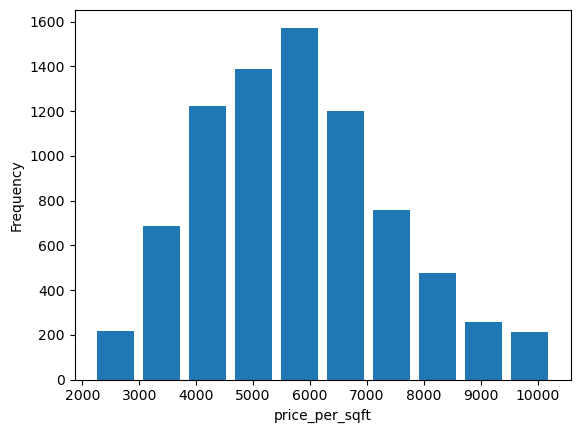

In [65]:
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Frequency')

In [66]:
df7[df7.bath>df7.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1846,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6008,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7754,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
9535,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [67]:
df8=df7[~(df7.bath>df7.BHK+2)]
df8

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000
1,1st Block Jayanagar,3 BHK,1760.0,3.0,115.0,3,6534.090909
3,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
4,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525
5,1st Phase JP Nagar,3 BHK,2024.0,3.0,157.0,3,7756.916996
...,...,...,...,...,...,...,...
11160,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
11161,other,2 BHK,1095.0,2.0,57.0,2,5205.479452
11162,other,2 BHK,1256.0,2.0,65.0,2,5175.159236
11163,other,2 BHK,1353.0,2.0,110.0,2,8130.081301


In [68]:
df8=df8.drop(['size','price_per_sqft'],axis='columns')

In [69]:
df8.head(10)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,1000.0,3.0,60.0,2
1,1st Block Jayanagar,1760.0,3.0,115.0,3
3,1st Phase JP Nagar,1875.0,3.0,167.0,3
4,1st Phase JP Nagar,2065.0,4.0,210.0,3
5,1st Phase JP Nagar,2024.0,3.0,157.0,3
6,1st Phase JP Nagar,1394.0,2.0,100.0,2
7,1st Phase JP Nagar,1077.0,2.0,93.0,2
8,1st Phase JP Nagar,840.0,2.0,50.0,1
9,1st Phase JP Nagar,1590.0,3.0,131.0,3
10,1st Phase JP Nagar,2180.0,3.0,210.0,3


In [70]:
# one hot encoding
dummies=pd.get_dummies(df8['location'],dtype=int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df9=pd.concat([df8,dummies],axis='columns')
df9.head(10)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,1000.0,3.0,60.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1760.0,3.0,115.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,2065.0,4.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2024.0,3.0,157.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,1394.0,2.0,100.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Phase JP Nagar,1077.0,2.0,93.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,840.0,2.0,50.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,1590.0,3.0,131.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2180.0,3.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# df10=df9.drop(['other'],axis='columns')

In [72]:
df9.head(10)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,1000.0,3.0,60.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1760.0,3.0,115.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,2065.0,4.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2024.0,3.0,157.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,1394.0,2.0,100.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Phase JP Nagar,1077.0,2.0,93.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,840.0,2.0,50.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,1590.0,3.0,131.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2180.0,3.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df10=df9.copy()

In [74]:
df11=df10.drop(['location'],axis='columns')
df11.head(30)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1000.0,3.0,60.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1760.0,3.0,115.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,3.0,167.00,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2065.0,4.0,210.00,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2024.0,3.0,157.00,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.0,2.0,100.00,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1077.0,2.0,93.00,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,840.0,2.0,50.00,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1590.0,3.0,131.00,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2180.0,3.0,210.00,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# X df i.e dataframe with all independent variables
# Y df i.e dependent variables

X=df11.drop(['price'],axis='columns')
X.shape

(7988, 243)

In [76]:
Y=df11.price
Y.shape

(7988,)

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [81]:
X_train.shape

(6390, 243)

In [82]:
Y_train.shape

(6390,)

In [83]:
X_test.shape

(1598, 243)

In [84]:
Y_test.shape

(1598,)

In [85]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)


LinearRegression()

In [86]:
lr_model.score(X_test,Y_test)

0.8443529405622127

In [87]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,Y,cv=cv)


array([ 8.98762248e-01,  8.52528404e-01,  9.18281368e-01, -6.91959161e+11,
        9.16746308e-01])

In [88]:
lr_model.score(X_test,Y_test)

0.8443529405622127

In [91]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=243)

In [89]:
np.where(X.columns=='1st Block Jayanagar')[0][0]

3

In [90]:
def predict_price(location,sqft,bath,bhk):
    location_index=np.where(X.columns==location)
    
    arr=np.zeros(len(X.columns))
    arr[0]=sqft
    arr[1]=bath
    arr[2]=bhk
    if location_index[0] > 2:
        arr[location_index[0][0]]=1
    elif not location_index:
        pass
        
    return lr_model.predict([arr])[0]
        
    

In [162]:
# def predict_price(location,sqft,bath,bhk):
#     location_index=np.where(X.columns==location)
    
#     arr=np.zeros(len(X.columns))
#     arr[0]=sqft
#     arr[1]=bath
#     arr[2]=bhk
#     if location_index[0] > 2:
#         arr[location_index[0]]=1
#     elif not location_index:
#         pass
        
#     print('model predict',lr_model.predict([arr])[0])
#     print(arr)
        
    

In [171]:
predict_price('whitefield',935,2,2)

C:\Users\dell\AppData\Local\Temp\ipykernel_19772\358799689.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if location_index[0] > 2:
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.909626544746956

In [177]:
predict_price('2nd Phase Judicial Layout',900,2,3)

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.215569655643428

In [178]:
predict_price('2nd Phase Judicial Layout',900,2,2)

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.33260485659079

In [180]:
import pickle

with open('Bengaluru_house_price.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [184]:
import json
columns={
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json","w") as ff:
    ff.write(json.dumps(columns))